In [1]:
from tensorflow.keras.datasets.fashion_mnist import load_data
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [2]:
(x_train, y_train), (x_test, y_test) = load_data()

| Label | Description |
|:-----:|-------------|
|   0   | T-shirt/top |
|   1   | Trouser     |
|   2   | Pullover    |
|   3   | Dress       |
|   4   | Coat        |
|   5   | Sandal      |
|   6   | Shirt       |
|   7   | Sneaker     |
|   8   | Bag         |
|   9   | Ankle boot  |

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

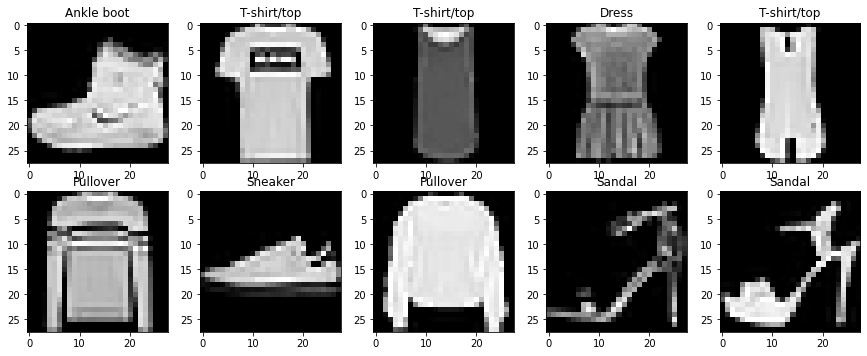

In [5]:
plt.figure(figsize=(15,15))
for i in range(10):
    plt.subplot(5,5, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(class_names[y_train[i]])
plt.show()

### Data Preparation

In [6]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [7]:
y_train[2]

0

In [8]:
y_train_ohe[2]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [9]:
'''
Input Dataset for ConvNets needs to be a 4D array
(1000, 28, 28, 3)

1000 - #Images
28, 28 - Size of the image (Height and width)
3 - #Channels (RGB = 3, Grayscale = 1)
'''

x_train = x_train.reshape(60000, 28, 28, 1).astype("float")
x_test = x_test.reshape(10000, 28, 28, 1).astype("float")

In [10]:
x_train.dtype

dtype('float64')

### Model Building

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Input, Dense, MaxPool2D, Activation, Flatten

- Increase the LR or Train for Longer increase epochs
- Add more conv layers
- #Kernels
- Size of the Kernel
- If Overfitting
    - Dropout
    - Regularizers
- Normalize / Min Max scaling data

In [12]:
model = Sequential()
model.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation("relu"))
# model.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='valid'))
# model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))

In [13]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [14]:
model.fit(x=x_train, 
          y=y_train_ohe, 
          batch_size=1000,
          validation_data=(x_test, y_test_ohe),
          epochs=12)

Epoch 1/12
60/60 [==============================] - 4s 60ms/step - loss: 24.4697 - accuracy: 0.4868 - val_loss: 8.9972 - val_accuracy: 0.6723
Epoch 2/12
60/60 [==============================] - 3s 57ms/step - loss: 6.7195 - accuracy: 0.7185 - val_loss: 5.7938 - val_accuracy: 0.7392
Epoch 3/12
60/60 [==============================] - 3s 57ms/step - loss: 4.7571 - accuracy: 0.7585 - val_loss: 4.5419 - val_accuracy: 0.7592
Epoch 4/12
60/60 [==============================] - 3s 58ms/step - loss: 3.8061 - accuracy: 0.7775 - val_loss: 3.8891 - val_accuracy: 0.7688
Epoch 5/12
60/60 [==============================] - 3s 57ms/step - loss: 3.1924 - accuracy: 0.7884 - val_loss: 3.2814 - val_accuracy: 0.7819
Epoch 6/12
60/60 [==============================] - 3s 57ms/step - loss: 2.7735 - accuracy: 0.7964 - val_loss: 3.0045 - val_accuracy: 0.7825
Epoch 7/12
60/60 [==============================] - 3s 56ms/step - loss: 2.4233 - accuracy: 0.8027 - val_loss: 2.5985 - val_accuracy: 0.7941
Epoch 8/12
6

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (1000, 26, 26, 3)         30        
                                                                 
 activation (Activation)     (1000, 26, 26, 3)         0         
                                                                 
 max_pooling2d (MaxPooling2  (1000, 13, 13, 3)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (1000, 507)               0         
                                                                 
 dense (Dense)               (1000, 10)                5080      
                                                                 
Total params: 5110 (19.96 KB)
Trainable params: 5110 (19.96 KB)
Non-trainable params: 0 (0.00 Byte)
______________________

In [16]:
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
train_accuracy = model.history.history['accuracy']
validation_accuracy = model.history.history['val_accuracy']

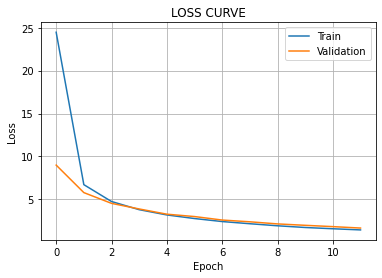

In [17]:
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("LOSS CURVE")
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

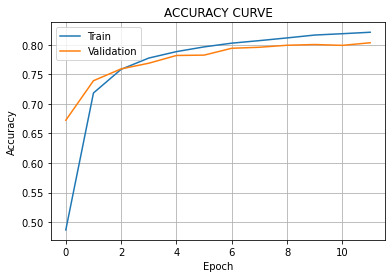

In [18]:
plt.plot(train_accuracy)
plt.plot(validation_accuracy)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("ACCURACY CURVE")
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

### Predictions

In [19]:
import numpy as np

In [20]:
preds = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [22]:
def function_predict(n):
    plt.imshow(x_test[n].reshape(28,28), cmap="gray")
    plt.title(f"Prediction : {class_names[np.argmax(preds[n])]} | Actual : {class_names[y_test[n]]}")
    plt.show()

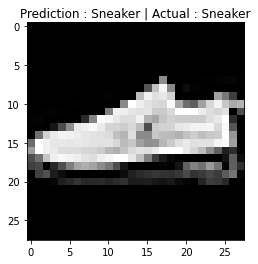

In [23]:
function_predict(38)

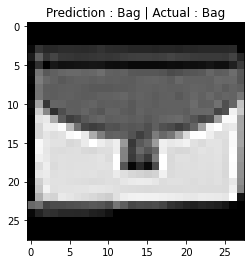

In [24]:
function_predict(78)

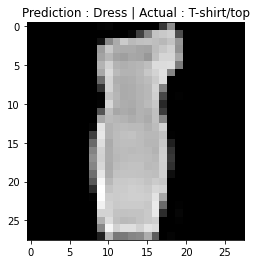

In [25]:
function_predict(1111)